In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
y = pd.read_excel("ex8_movies.xlsx",sheet_name="y",header=None)
y.shape
y.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,5,4,0,0,4,4,0,0,0,4,...,2,3,4,0,4,0,0,5,0,0
1,3,0,0,0,3,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,5
2,4,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
3,3,0,0,0,0,0,5,0,0,4,...,5,0,0,0,0,0,2,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
r = pd.read_excel("ex8_movies.xlsx",sheet_name="R",header=None)
r.shape
r.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,True,True,False,False,True,True,False,False,False,True,...,True,True,True,False,True,False,False,True,False,False
1,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
for i in range(len(r.columns)):
    r[i] = r[i].replace({True:1,False:0})

print(r[0][2])
print(y[0][2])

1
4


In [5]:
X = pd.read_excel("movie_params.xlsx",sheet_name="X",header=None)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,1.048686,-0.400232,1.194119,0.371128,0.407607,0.974407,-0.058410,0.861721,-0.697290,0.288746
1,0.780851,-0.385626,0.521198,0.227355,0.570109,0.641264,-0.550006,0.704021,-0.485835,-0.564624
2,0.641509,-0.547854,-0.083796,-0.598519,-0.017694,0.299736,-0.720807,0.838546,-0.694832,-1.134796
3,0.453618,-0.800218,0.680481,-0.081743,0.136601,0.907561,0.277682,0.369300,-1.261208,-0.235581
4,0.937538,0.106090,0.361953,0.086646,0.287505,0.518644,-0.056871,0.914573,-0.819334,-0.542847


In [6]:
theta = pd.read_excel('movie_params.xlsx', sheet_name='theta', header=None)
theta.head()

,0,1,2,3,4,5,6,7,8,9
0,0.285444,-1.684265,0.262939,-0.287317,0.585725,0.980188,-0.063375,0.767232,-1.104602,-0.251867
1,0.505013,-0.454648,0.317462,-0.115087,0.567704,0.818905,0.461649,1.093063,-1.200294,-0.391617
2,-0.431917,-0.478804,0.846711,-0.011731,-0.138578,0.742591,-0.440276,1.363340,-0.325235,-0.194682
3,0.728598,-0.271894,0.326844,-0.250724,-0.471017,1.215827,-0.106129,1.615801,-0.670805,0.129868
4,0.052119,-1.380697,0.637941,-0.231980,0.246337,1.438879,-0.860022,0.668077,-0.560330,0.414959


In [7]:
def costfunction(X, y, r, theta, Lambda):
    predictions = np.dot(X, theta.T)
    err = predictions-y
    J = (1/2) * np.sum((err**2) * r)
    reg_x = Lambda/2 * np.sum(np.sum(theta**2))
    reg_theta = Lambda/2 * np.sum(np.sum(X**2))
    cost = J + reg_x + reg_theta
    return cost

In [20]:
def gradientDescent(X, y, r, theta, Lambda, num_iter, alpha):
    J_hist = []
    for i in range(num_iter):
        cost = costfunction(X, y, r, theta, Lambda)
        X = X -  alpha*(np.dot(np.dot(X, theta.T) - y, theta) + Lambda*X)
        theta = theta - alpha*(np.dot((np.dot(X, theta.T) - y).T, X) + Lambda*theta) 
        J_hist.append(cost)
        if (i >= 20):
            temp_last=J_hist[len(J_hist)-1]
            temp_before_last=J_hist[len(J_hist)-2]
            print(temp_last,temp_before_last)
            change = -temp_last + temp_before_last
            print("the change is ",change)
            if((-0.009<change<0.009) | (0<change<0.001) ):
                break
        print(cost)
    return X, theta, J_hist

In [9]:
def normalizeRatings(y, r):
    ymean = np.sum(y, axis=1)/np.sum(r, axis=1)
    ynorm = np.sum(y, axis=1)*np.sum(r, axis=1) - ymean
    return ymean, ynorm

In [10]:
my_ratings = np.zeros((1682,1))

In [11]:
y1 = np.hstack((my_ratings,y))

In [12]:
my_r = np.zeros((1682,1))
for i in range(len(my_r)):
    if(my_ratings[i] != 0):
        my_r[i] = 1
print(my_r)        

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [13]:
#print(r)
r1 = np.hstack((my_r, r))
r1 = np.array(r1)
#print(r1.astype(int))
print(np.array(y,dtype=np.float32))
y = np.array(y,dtype=np.float64)
r = np.array(r)
print(y.shape[0])
print(y.shape[1])
print(r.shape[0])
print(r.shape[1])
print(np.array(r).shape)
print(np.array(r))
print(r[0][2])
print(y[0][2])


[[5. 4. 0. ... 5. 0. 0.]
 [3. 0. 0. ... 0. 0. 5.]
 [4. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1682
943
1682
943
(1682, 943)
[[1 1 0 ... 1 0 0]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0
0.0


In [15]:
ymean, ynorm = normalizeRatings(y1, r1)
print(pd.DataFrame(ymean).head(15))
print(pd.DataFrame(ynorm).head(15))
print(y)
for yaxis in range(y.shape[0]):
    for xaxis in range(y.shape[1]):
        if(r[yaxis][xaxis] == 1):
            #print("\nr is equal 1")
            #print("cell no. "+str(yaxis)+" "+str(xaxis)+" has value "+ str(y[yaxis][xaxis]))
            y[yaxis][xaxis] = y[yaxis][xaxis] - ymean[xaxis]
            #print("cell no. "+str(yaxis)+" "+str(xaxis)+" updated to "+ str(y[yaxis][xaxis])+"\n")
        #else:
            #print("\ncell no. "+str(yaxis)+" "+str(xaxis)+" has value "+ str(y[yaxis][xaxis]))
            #print("r is not equal 1\n")
            
            
            

           0
0   3.878319
1   3.206107
2   3.033333
3   3.550239
4   3.302326
5   3.576923
6   3.798469
7   3.995434
8   3.896321
9   3.831461
10  3.847458
11  4.385768
12  3.418478
13  3.967213
14  3.778157
                0
0   792352.121681
1    55016.793893
2    24566.966667
3   155074.449761
4    24420.697674
5     2414.423077
6   583684.201531
7   191621.004566
8   348331.103679
9    30345.168539
10  214284.152542
11  312652.614232
12  115732.581522
13  132854.032787
14  324347.221843
[[5. 4. 0. ... 5. 0. 0.]
 [3. 0. 0. ... 0. 0. 5.]
 [4. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:

print(y)
num_users = y.shape[1]
num_movies = y.shape[0]
num_features = 10
print(ymean)

[[ 1.12168142  0.79389313  0.         ...  1.93478261  0.
   0.        ]
 [-0.87831858  0.          0.         ...  0.          0.
   1.525     ]
 [ 0.12168142  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[3.87831858 3.20610687 3.03333333 ... 2.         3.         3.        ]


In [17]:
X1= np.random.randn(num_movies, num_features)
Theta1 = np.random.randn(num_users, num_features)
Lambda=10

In [21]:
print("this is r")
print(np.array(r))

print("this is r1")
print(np.array(r1).astype(int))

print("this is y")
print(y)


print("this is y1")
print(np.array(y1))

x_up, theta_up, J_hist = gradientDescent(X1, y, r, Theta1, Lambda, 500,0.001)

this is r
[[1 1 0 ... 1 0 0]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
this is r1
[[0 1 1 ... 1 0 0]
 [0 1 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
this is y
[[ 1.12168142  0.79389313  0.         ...  1.93478261  0.
   0.        ]
 [-0.87831858  0.          0.         ...  0.          0.
   1.525     ]
 [ 0.12168142  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
this is y1
[[0. 5. 4. ... 5. 0. 0.]
 [0. 3. 0. ... 0. 0. 5.]
 [0. 4. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
741085.2184908593
136485.2111965335
127768.65561846981
126423.3876940404
125505.73244529348
124649.0226113947
123814.0

72999.25731390527 73189.60013943995
the change is  190.34282553468074
72999.25731390527
72813.47116782241 72999.25731390527
the change is  185.78614608285716
72813.47116782241
72632.25840044848 72813.47116782241
the change is  181.21276737393055
72632.25840044848
72455.6086314833 72632.25840044848
the change is  176.64976896518783
72455.6086314833
72283.48499701903 72455.6086314833
the change is  172.12363446426752
72283.48499701903
72115.82530586275 72283.48499701903
the change is  167.65969115628104
72115.82530586275
71952.54366838938 72115.82530586275
the change is  163.28163747336657
71952.54366838938
71793.53250401386 71952.54366838938
the change is  159.01116437552264
71793.53250401386
71638.66483209476 71793.53250401386
the change is  154.86767191909894
71638.66483209476
71487.79675404771 71638.66483209476
the change is  150.86807804704586
71487.79675404771
71340.77004088798 71487.79675404771
the change is  147.02671315973566
71340.77004088798
71197.41474946382 71340.77004088798

63364.20258096812 63417.52120739665
the change is  53.31862642852502
63364.20258096812
63312.15188964959 63364.20258096812
the change is  52.05069131853088
63312.15188964959
63261.354114232476 63312.15188964959
the change is  50.79777541711519
63261.354114232476
63211.793712622646 63261.354114232476
the change is  49.56040160982957
63211.793712622646
63163.4546280305 63211.793712622646
the change is  48.33908459214581
63163.4546280305
63116.32028922736 63163.4546280305
the change is  47.134338803138235
63116.32028922736
63070.373606155 63116.32028922736
the change is  45.94668307236134
63070.373606155
63025.596963935735 63070.373606155
the change is  44.77664221926534
63025.596963935735
62981.97221798069 63025.596963935735
the change is  43.62474595504318
62981.97221798069
62939.480692484285 62981.97221798069
the change is  42.49152549640712
62939.480692484285
62898.10318412748 62939.480692484285
the change is  41.377508356803446
62898.10318412748
62857.81997233585 62898.10318412748
th

61552.15747178587 61556.22160653492
the change is  4.064134749052755
61552.15747178587
61548.18851115604 61552.15747178587
the change is  3.968960629827052
61548.18851115604
61544.31204652498 61548.18851115604
the change is  3.876464631059207
61544.31204652498
61540.52547911676 61544.31204652498
the change is  3.786567408220435
61540.52547911676
61536.826287410244 61540.52547911676
the change is  3.699191706517013
61536.826287410244
61533.212025075845 61536.826287410244
the change is  3.614262334398518
61533.212025075845
61529.68031894276 61533.212025075845
the change is  3.531706133086118
61529.68031894276
61526.22886699474 61529.68031894276
the change is  3.451451948021713
61526.22886699474
61522.85543639779 61526.22886699474
the change is  3.3734305969483103
61522.85543639779
61519.55786155968 61522.85543639779
the change is  3.2975748381068115
61519.55786155968
61516.334042222814 61519.55786155968
the change is  3.2238193368684733
61516.334042222814
61513.181941590934 61516.3340422

61385.130284065286 61385.86064105491
the change is  0.7303569896248518
61385.130284065286
61384.409487240206 61385.130284065286
the change is  0.7207968250804697
61384.409487240206
61383.69805697849 61384.409487240206
the change is  0.7114302617192152
61383.69805697849
61382.995804225946 61383.69805697849
the change is  0.7022527525405167
61382.995804225946
61382.302544356455 61382.995804225946
the change is  0.6932598694911576
61382.302544356455
61381.61809705637 61382.302544356455
the change is  0.6844473000819562
61381.61809705637
61380.94228621216 61381.61809705637
the change is  0.675810844215448
61380.94228621216
61380.274939801646 61380.94228621216
the change is  0.6673464105115272
61380.274939801646
61379.61588978834 61380.274939801646
the change is  0.6590500133024761
61379.61588978834
61378.96497201911 61379.61588978834
the change is  0.6509177692350931
61378.96497201911
61378.32202612399 61378.96497201911
the change is  0.6429458951170091
61378.32202612399
61377.68689542006 

61342.38424791048 61342.6894541422
the change is  0.3052062317219679
61342.38424791048
61342.08095411091 61342.38424791048
the change is  0.3032937995667453
61342.08095411091
61341.779546295176 61342.08095411091
the change is  0.30140781573572895
61341.779546295176
61341.479998520605 61341.779546295176
the change is  0.29954777457169257
61341.479998520605
61341.18228533952 61341.479998520605
the change is  0.2977131810839637
61341.18228533952
61340.88638178863 61341.18228533952
the change is  0.29590355089021614
61340.88638178863
61340.59226337877 61340.88638178863
the change is  0.29411840985994786
61340.59226337877
61340.29990608479 61340.59226337877
the change is  0.29235729398351396
61340.29990608479
61340.009286335844 61340.29990608479
the change is  0.29061974894284504
61340.009286335844
61339.7203810057 61340.009286335844
the change is  0.2889053301405511
61339.7203810057
61339.43316740323 61339.7203810057
the change is  0.2872136024743668
61339.43316740323
61339.1476232636 6133

Text(0.5, 1.0, 'Cost function using Gradient Descent')

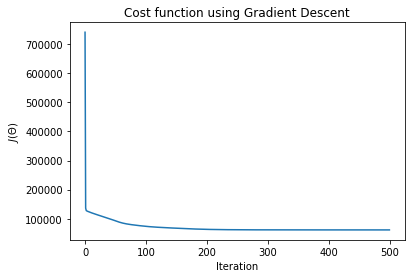

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [19]:
print(pd.DataFrame(x_up).head(12))
print(pd.DataFrame(theta_up).head(12))

           0         1         2         3         4         5         6  \
0   0.136994  0.260000 -0.111761 -0.300689  0.000971 -0.201263 -0.378780   
1   0.031487  0.065854 -0.085054  0.007630 -0.097199 -0.056827 -0.011455   
2  -0.088813  0.010596  0.102335  0.084268 -0.013957 -0.055038 -0.027956   
3   0.033800 -0.016874  0.021070 -0.156773  0.063704  0.037612  0.034928   
4  -0.078958  0.112102 -0.042641  0.036090 -0.026686 -0.150918 -0.070675   
5  -0.008564 -0.023584 -0.025353 -0.015878  0.000593 -0.000617 -0.000421   
6   0.168083  0.145281  0.204893 -0.152660  0.184599  0.159839 -0.008013   
7   0.093322  0.098694 -0.228506 -0.066085  0.087186  0.137312 -0.179236   
8  -0.152040  0.031586  0.003145  0.070906  0.147641 -0.033028 -0.112735   
9   0.068793 -0.105156 -0.090411  0.093889  0.110136  0.154443  0.002181   
10 -0.099734  0.235163  0.288596 -0.185436 -0.066503 -0.104534  0.067835   
11 -0.024849 -0.053416  0.378245 -0.295704  0.174328 -0.015089 -0.070496   

           

In [20]:
predictions = np.dot(x_up, theta_up.T)
print("**************************")
print(pd.DataFrame(predictions).head(12))
print("**************************")
print("**************************")
print(pd.DataFrame(predictions[:,0].reshape(1682,1)).head(100))
#df = pd.DataFrame(np.hstack((my_predictions,np.array(movies)[:,np.newaxis])))


**************************
         0         1         2         3         4         5         6    \
0   0.299726  0.107642 -0.020724  0.128214  0.602444  0.303589  0.524775   
1  -0.255497 -0.011933 -0.020483 -0.013014 -0.001231 -0.070788  0.003516   
2  -0.168590 -0.080857  0.023003  0.010627 -0.151886 -0.195263  0.030411   
3   0.336319  0.003949 -0.014053 -0.038168  0.157044  0.174051  0.058947   
4  -0.195756 -0.000660 -0.028218 -0.000315 -0.111344 -0.135794 -0.061231   
5   0.021792  0.014172 -0.012996 -0.013270 -0.021137  0.069385 -0.024922   
6   0.829989  0.060524  0.084662  0.116297  0.630827  0.163175  0.664094   
7   0.405392  0.112219 -0.031921 -0.011816  0.387124  0.508508  0.655673   
8   0.504422  0.248047  0.064230  0.021630 -0.253362  0.519877  0.254980   
9   0.243653  0.079802 -0.025186 -0.021772  0.121784  0.243338  0.402366   
10  0.292740 -0.103325  0.040933  0.003931  0.093138  0.002869  0.436487   
11  1.096895  0.126840  0.137766  0.060987  0.169341  0.67017

In [24]:
movies = open('movie_ids.txt', 'r').read().split("\n")[:-1]
print(pd.DataFrame(predictions))
print(ymean.shape)
predictions_after_adding_new_user = np.hstack((my_ratings,predictions))
# for yaxis in range(predictions_after_adding_new_user.shape[0]):
#     for xaxis in range(predictions_after_adding_new_user.shape[1]):
#         if(r1[yaxis][xaxis] == 1):
#             print("\nr is equal 1")
#             print("cell no. "+str(yaxis)+" "+str(xaxis)+" has value "+ str(y[yaxis][xaxis]))
#             predictions_after_adding_new_user[yaxis][xaxis] = predictions_after_adding_new_user[yaxis][xaxis] + ymean[xaxis]
#             print("cell no. "+str(yaxis)+" "+str(xaxis)+" updated to "+ str(y[yaxis][xaxis])+"\n")
#         else:
#             predictions_after_adding_new_user[yaxis][xaxis] = ymean[xaxis]
#             print("\ncell no. "+str(yaxis)+" "+str(xaxis)+" has value "+ str(y1[yaxis][xaxis]))
#             print("r is not equal 1\n")

#print(predictions_after_adding_new_user+ymean)
my_predictions = predictions[:, 1] + ymean
my_predictions = pd.DataFrame(my_predictions)

           0         1         2         3         4         5         6    \
0     0.299726  0.107642 -0.020724  0.128214  0.602444  0.303589  0.524775   
1    -0.255497 -0.011933 -0.020483 -0.013014 -0.001231 -0.070788  0.003516   
2    -0.168590 -0.080857  0.023003  0.010627 -0.151886 -0.195263  0.030411   
3     0.336319  0.003949 -0.014053 -0.038168  0.157044  0.174051  0.058947   
4    -0.195756 -0.000660 -0.028218 -0.000315 -0.111344 -0.135794 -0.061231   
...        ...       ...       ...       ...       ...       ...       ...   
1677 -0.003061  0.005200  0.009293  0.005747 -0.001475 -0.000597 -0.000164   
1678 -0.009183  0.015600  0.027880  0.017240 -0.004425 -0.001791 -0.000492   
1679 -0.006122  0.010400  0.018587  0.011493 -0.002950 -0.001194 -0.000328   
1680  0.020826 -0.000034 -0.002763 -0.003298 -0.000624 -0.000048  0.024376   
1681  0.053046 -0.001614 -0.009257 -0.008581  0.004612 -0.011740  0.011018   

           7         8         9    ...       933       934    

In [25]:
df = pd.DataFrame(np.hstack((my_predictions,np.array(movies).reshape(len(y1),1))))


In [26]:
df.sort_values(by=[0],ascending=False,inplace=True)
df.head(20)
#the english patient drama romance sacrifise war
#contact romance sacrifice
#titanic romance sacrifice 
#the full monty comedy romance
#fargo black comedy crime 
#L.A. Confidential crime drama 

,0,1
285,7.416861952257697,"286 English Patient, The (1996)"
312,7.282573659572314,313 Titanic (1997)
257,7.168891940286631,258 Contact (1997)
301,7.009823805185657,302 L.A. Confidential (1997)
99,6.94378943700321,100 Fargo (1996)
268,6.941325487102347,"269 Full Monty, The (1997)"
299,6.892353352428007,300 Air Force One (1997)
49,6.792368833404983,50 Star Wars (1977)
274,6.594794621046336,275 Sense and Sensibility (1995)
271,6.460529907373472,272 Good Will Hunting (1997)
